In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/MSc e-Science/DVE 2024/logbook_assignment1.csv'
data = pd.read_csv(file_path)
data.sample(6,random_state = 72)

<ipython-input-13-937d48acecdf>:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1105362,Mar 23 2018,Mar 23 2018,"47,770",13.284,$3.539,$47.01,13.4,NaN,https://www.somewebsite.com/nissan/370z/2009/5...
85085,NaN,Feb 5 2022,"178,014",14.534,$3.249,$47.22,11.3,NaN,https://www.somewebsite.com/toyota/highlander/...
539076,37 mph,Feb 11 2015,NaN,14.538,$2.029,$29.50,29.3,426.1,https://www.somewebsite.com/subaru/impreza/199...
1039379,Jun 7 2021,Jun 7 2021,NaN,14.073,$3.179,$44.74,35.0,492.4,https://www.somewebsite.com/volkswagen/golf/20...
572405,Sep 1 2018,Sep 26 2018,"71,939",16.643,$14.180,$236.00,25.2,NaN,https://www.somewebsite.com/mitsubishi/l200/20...
574561,Trip Comp 11.2L/100Km,Aug 11 2019,NaN,9.788,CA$5.37,CA$52.57,18.7,182.9,https://www.somewebsite.com/audi/rs5/2014/250527


# 1 . Data Cleaning

## 1.1 Date Fields

### 1 . Percentage of date_fueled entries that are not proper dates.

In [ ]:
date_validation = pd.to_datetime(data['date_fueled'], format='%b %d %Y', errors='coerce')
percentage_invalid_dates = (date_validation.isnull().mean()) * 100
print(f'{percentage_invalid_dates:.2f}% of date fueled entries that are not proper dates.')

11.68% of date fueled entries that are not proper dates.


### 3 . Converting the column to a date format, setting any invalid date fueled entries to NaT.

In [ ]:
data['date_fueled'] = pd.to_datetime(data['date_fueled'], format='%b %d %Y', errors='coerce')
data['date_captured'] = pd.to_datetime(data['date_captured'], format='%b %d %Y', errors='coerce')
data.sample(6,random_state = 72)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1105362,2018-03-23,2018-03-23,"47,770",13.284,$3.539,$47.01,13.4,NaN,https://www.somewebsite.com/nissan/370z/2009/5...
85085,NaT,2022-02-05,"178,014",14.534,$3.249,$47.22,11.3,NaN,https://www.somewebsite.com/toyota/highlander/...
539076,NaT,2015-02-11,NaN,14.538,$2.029,$29.50,29.3,426.1,https://www.somewebsite.com/subaru/impreza/199...
1039379,2021-06-07,2021-06-07,NaN,14.073,$3.179,$44.74,35.0,492.4,https://www.somewebsite.com/volkswagen/golf/20...
572405,2018-09-01,2018-09-26,"71,939",16.643,$14.180,$236.00,25.2,NaN,https://www.somewebsite.com/mitsubishi/l200/20...
574561,NaT,2019-08-11,NaN,9.788,CA$5.37,CA$52.57,18.7,182.9,https://www.somewebsite.com/audi/rs5/2014/250527


### 2 . Fill Invalid 'Date Fueled' Entries with 'Date Captured'

#### Validate date_captured

In [ ]:
date_validation_captured = data['date_captured']
date_validation_captured_percentage = (date_validation_captured.notnull().mean()) * 100
print(f'{date_validation_captured_percentage:.2f}% of date capture entries that are proper dates.')

100.00% of date capture entries that are proper dates.


#### Replace invalid dates in `date_fueled` with the corresponding valid dates from `date_captured`\.

In [ ]:
data.loc[date_validation.isna(), "date_fueled"] = data['date_captured']
data.sample(6,random_state = 72)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1105362,2018-03-23,2018-03-23,"47,770",13.284,$3.539,$47.01,13.4,NaN,https://www.somewebsite.com/nissan/370z/2009/5...
85085,2022-02-05,2022-02-05,"178,014",14.534,$3.249,$47.22,11.3,NaN,https://www.somewebsite.com/toyota/highlander/...
539076,2015-02-11,2015-02-11,NaN,14.538,$2.029,$29.50,29.3,426.1,https://www.somewebsite.com/subaru/impreza/199...
1039379,2021-06-07,2021-06-07,NaN,14.073,$3.179,$44.74,35.0,492.4,https://www.somewebsite.com/volkswagen/golf/20...
572405,2018-09-01,2018-09-26,"71,939",16.643,$14.180,$236.00,25.2,NaN,https://www.somewebsite.com/mitsubishi/l200/20...
574561,2019-08-11,2019-08-11,NaN,9.788,CA$5.37,CA$52.57,18.7,182.9,https://www.somewebsite.com/audi/rs5/2014/250527


### 4 . Removing dates that are in the future, or dates that are earlier than 2005.

In [ ]:
number_of_dates_earlier_than_2005 = (data['date_fueled'].dt.year < 2005).sum()
print(f"They're {number_of_dates_earlier_than_2005} fueled dates that are earlier than 2005.")
number_of_future_dates = (data['date_fueled']> '2024-08-14').sum()
print(f"They're {number_of_future_dates} fueled dates that are in the future.")
print()

number_of_dates_earlier_than_2005 = (data['date_captured'].dt.year < 2005).sum()
print(f"They're {number_of_dates_earlier_than_2005} captured dates that are earlier than 2005.")
number_of_future_dates = (data['date_captured']> '2024-08-14').sum()
print(f"They're {number_of_future_dates} captured dates that are in the future.")

data = data[(data['date_fueled'].dt.year >= 2005) & (data['date_fueled'] <= '2024-08-22')]

They're 558 fueled dates that are earlier than 2005.
They're 18 fueled dates that are in the future.

They're 0 captured dates that are earlier than 2005.
They're 0 captured dates that are in the future.


In [ ]:
data.shape

(1174294, 9)

### 5 . Distribution of fueling dates

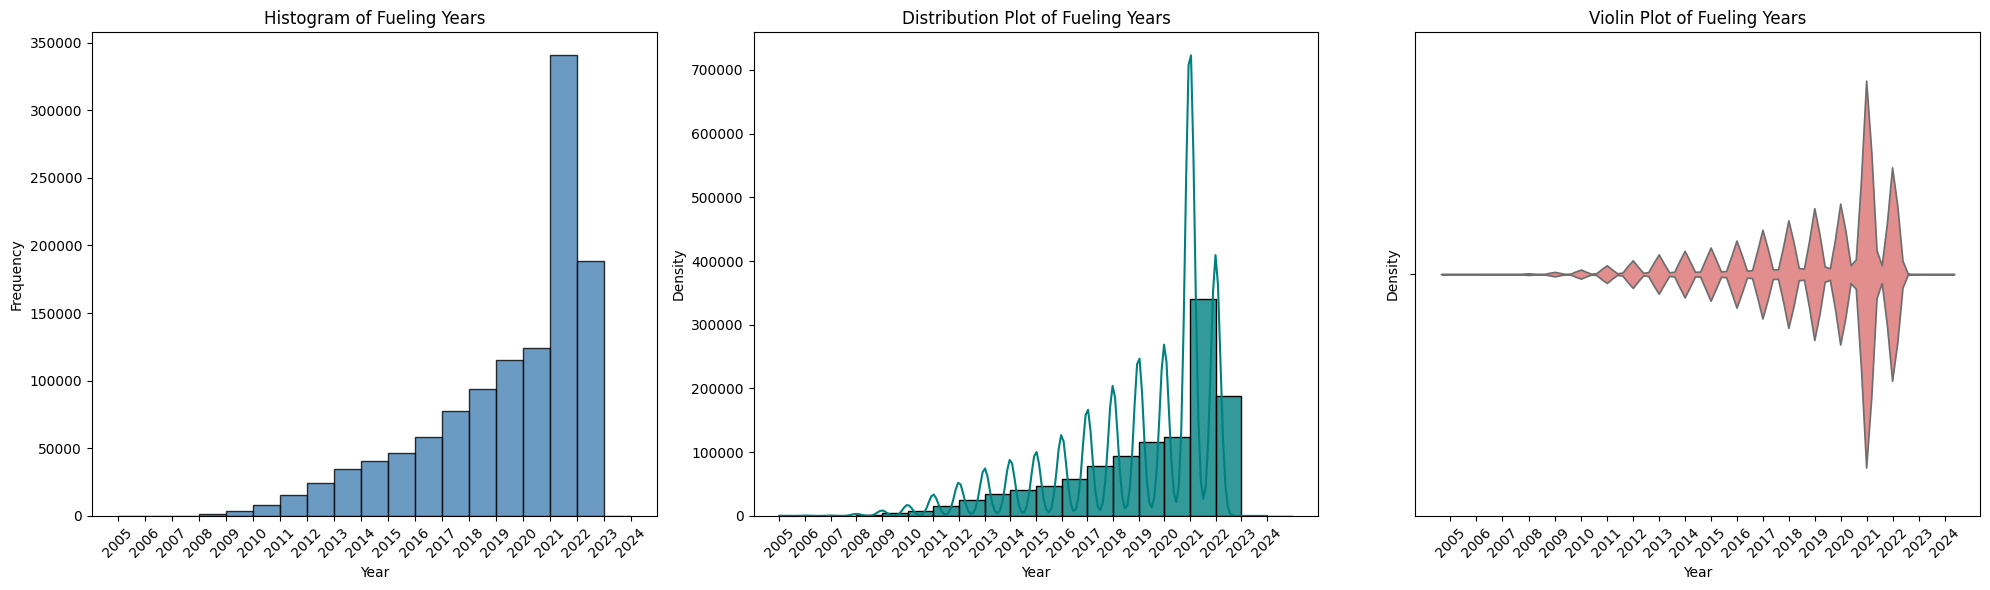

In [ ]:
data['year'] = data['date_fueled'].dt.year
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Histogram of years with solid bars
ax1.hist(data['year'], bins=range(data['year'].min(), data['year'].max() + 1), edgecolor='black', color='steelblue', alpha=0.8)
ax1.set_title('Histogram of Fueling Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')

# Seaborn histplot with solid bars and defined bins
sns.histplot(data['year'], kde=True, ax=ax2, color='teal', alpha=0.8, element='bars', edgecolor='black', binwidth=1, binrange=(data['year'].min(), data['year'].max() + 1))
ax2.set_title('Distribution Plot of Fueling Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Density')

# Violin plot without internal points
sns.violinplot(x='year', data=data, ax=ax3, color='lightcoral', inner=None)
ax3.set_title('Violin Plot of Fueling Years')
ax3.set_xlabel('Year')
ax3.set_ylabel('Density')

# Explicitly set x-ticks as integers
years = data['year'].unique()
ax1.set_xticks(years)
ax2.set_xticks(years)
ax3.set_xticks(years)

ax1.set_xticklabels(years, rotation=45)
ax2.set_xticklabels(years, rotation=45)
ax3.set_xticklabels(years, rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

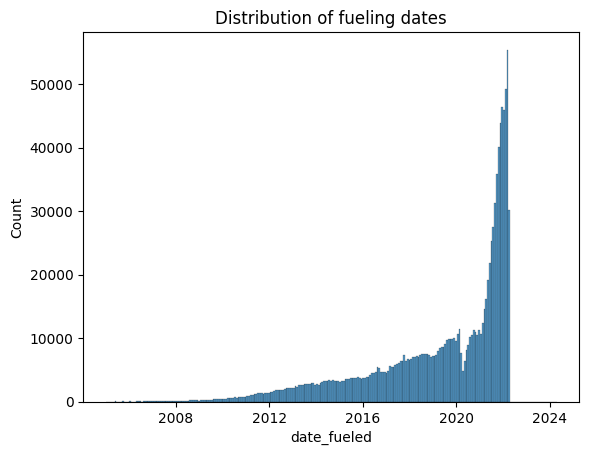

In [ ]:
sns.histplot(data, x="date_fueled")
plt.title("Distribution of fueling dates");

####  Interpretation/Comment on the Results


The histogram illustrates that the distribution of the fueling dates data over time is left-skewed.<br>**Key observations**:

- **Trend Observation**: The histogram indicates a significant increase in the number of records related or fuel usage over time, particularly from around 2010 onwards.

- **Early Years**: Between 2005 and approximately 2010, the data points are relatively scarce, suggesting that the data collection were not as frequent during these years.

- **Recent Years**: The sharp increase in the later years suggests that there might have been significant growth in the fuel usage.

In [ ]:
(data['date_fueled'] == '2024-04-20').sum()

1

## 1.2 Numeric Fields

### 1 . Missing Data Percentage

In [ ]:
#  Identify what percentage of gallons, miles, and odometer entries are missing.
numeric_columns = ['gallons', 'miles', 'odometer']
missing_data_percentage = data[numeric_columns].isnull().mean() * 100
for d,c in zip(missing_data_percentage,numeric_columns):
  print(f"{d:.2f}% of {c} entries are missing.")

6.32% of gallons entries are missing.
87.55% of miles entries are missing.
12.69% of odometer entries are missing.


### 3 . Converting Strings To Floats

In [ ]:
columns_of_interest = ['gallons', 'miles', 'mpg', 'odometer']
data[columns_of_interest] = data[columns_of_interest].replace(',', '', regex=True).astype(float)
for col in columns_of_interest:
  print(f"{col} column data type : {data[col].dtype}")

gallons column data type : float64
miles column data type : float64
mpg column data type : float64
odometer column data type : float64


### 2 . Calculate Missing Values From Interdependence

$\text{MPG} = \frac{\text{Miles Driven}}{\text{Gallons of Fuel Used}}$


In [ ]:
def fill_missing(target,data):
     if target == 'mpg':
          fill_values = data['miles'] / data['gallons']
     elif target == 'miles':
         fill_values = data['mpg'] * data['gallons']
     elif target == 'gallons':
         fill_values = data['miles'] / data['mpg']

     return fill_values

In [ ]:
print(f'{sum(data[columns_of_interest[:-1]].isnull().sum(axis=1)==1)} entries have exactly one missing value')
print(f'{sum(data[columns_of_interest[:-1]].isnull().sum(axis=1)==2)} entries have exactly two missing value')
print(f'{sum(data[columns_of_interest[:-1]].isnull().sum(axis=1)==3)} entries have exactly three missing values')

953968 entries have exactly one missing value
0 entries have exactly two missing value
74171 entries have exactly three missing values


In [ ]:
for col in columns_of_interest[:-1]:
    data.loc[data[col].isna(), col] = fill_missing(col,data)

###  4 . Plot the distributions and comment on the distributions

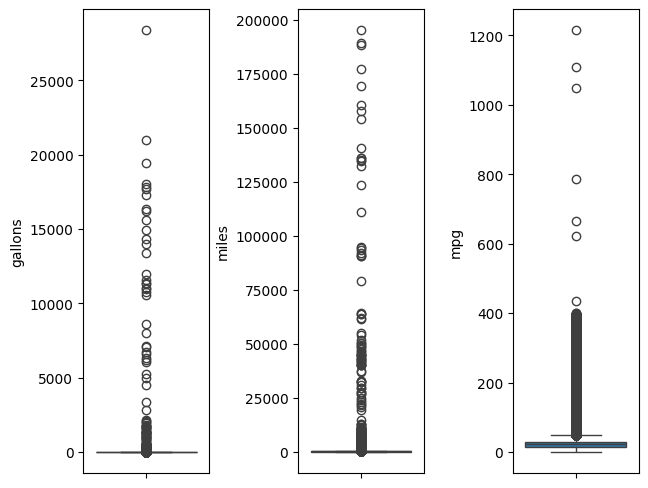

In [ ]:
data_m_g_mpg = data[['gallons', 'miles', 'mpg']]
fig, axs = plt.subplots(ncols=3, nrows=1)
index = 0
axs = axs.flatten()
for k,v in data_m_g_mpg.items():
    sns.boxplot(y=k, data=data_m_g_mpg, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



<ipython-input-28-9fbc06fde6b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-28-9fbc06fde6b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-28-9fbc06fde6b8>:5: UserWarning: 

`distplot` is a deprecated function and will be 

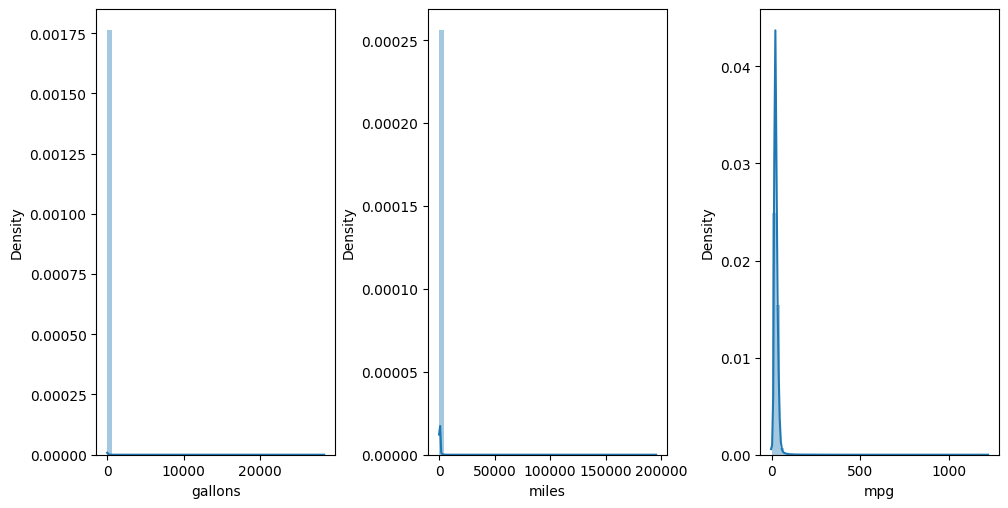

In [ ]:

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in data_m_g_mpg.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0);

###  5 . Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense?

In [ ]:
data[columns_of_interest[:-1]].describe().round(2)

,gallons,miles,mpg
count,1100123.00,1100123.00,1100123.00
mean,12.80,269.45,22.16
std,74.48,725.77,15.74
min,0.00,0.00,0.00
25%,8.99,181.40,15.60
50%,11.95,267.05,21.80
75%,14.94,342.76,28.50
max,28380.00,195321.20,1214.30


### Interpretation of Mean, Max, and Min Values:

1. **Gallons:**
   - **Mean (12.80 gallons):** Aligns with typical vehicle fuel capacities (10.5 to 18.5 gallons), suggesting normal usage.
   - **Max (28380.00 gallons):** Unrealistically high, likely due to data entry errors or outliers.
   - **Min (0.00 gallons):** Illogical, as a fuel log should record fuel added, indicating possible entry errors.

2. **MPG (Miles Per Gallon):**
   - **Mean (22.16 mpg):** Close to the EPA-reported average, indicating realistic vehicle performance.
   - **Max (1214.30 mpg):** Not feasible, suggesting data errors.
   - **Min (0.00 mpg):** Impossible, likely due to data entry errors or miscalculations.

3. **Miles:**
   - **Mean (269.45 miles):** Reasonable, fitting within expected travel ranges (248.01 to 436.97 miles) based on the EPA-reported average mpg and typical vehicle fuel capacities.
   - **Max (195321.20 miles):** Improbably high for a single trip, likely a cumulative entry or error.
   - **Min (0.00 miles):** Illogical, suggesting the vehicle didn’t move, which contradicts the purpose of the log.
### Overall Interpretation:
- **Mean values** are reasonable and reflect typical data.
- **Max values** suggest outliers or errors that need correction.
- **Min values of 0** are illogical for fuel logs, indicating potential data entry mistakes.



# 2 . Feature Engineering


## 1 . Creating a new column with the currency.

In [ ]:
# Splitting 'total_spent' on digits and retaining only the first element
data['currency'] = data['total_spent'].str.split('\d').str[0]
data['currency'].value_counts()

,count
currency,
$,741947
£,87587
€,59273
CA$,46848
R,36424
...,...
TMT,11
CV$,11
KGS,9


## 2 . Creating a new column containing the float value of the total spend and the cost per gallon.

In [ ]:
# Remove any character that comes before the first number and comma
data['total_spent_float'] = data['total_spent'].str.replace(r'^[^\d]*', '', regex=True).str.replace(',','')
data['cost_per_gallon_float'] = data['cost_per_gallon'].str.replace(r'^[^\d]*', '', regex=True).str.replace(',','')

# Convert the cleaned string values to float
data['total_spent_float'] = data['total_spent_float'].astype(float)
data['cost_per_gallon_float'] = data['cost_per_gallon_float'].astype(float)

data[['date_fueled', 'date_captured', 'cost_per_gallon', 'total_spent', 'currency','cost_per_gallon_float', 'total_spent_float']].sample(6)

,date_fueled,date_captured,cost_per_gallon,total_spent,currency,cost_per_gallon_float,total_spent_float
1155532,2021-07-24,2021-07-24,$3.599,$33.89,$,3.599,33.89
852968,2014-02-22,2014-02-23,$3.819,$137.97,$,3.819,137.97
714919,2018-08-11,2018-08-11,NaN,NaN,NaN,NaN,NaN
942148,2020-06-29,2020-06-29,$2.159,$19.01,$,2.159,19.01
227246,2013-06-01,2016-09-18,$4.299,$55.97,$,4.299,55.97
415333,2021-11-25,2021-11-25,$72.491,"$1,008.25",$,72.491,1008.25


 ## 3 . Create Car information columns i.e car make, model, year ,user id

In [ ]:
# Split the URL to remove the domain part
split_url = data['user_url'].str.split('https://www.somewebsite.com/')

# Further split the resulting part by '/' and ensure there are exactly 4 parts
split_parts = split_url.str[1].str.split('/', expand=True).iloc[:, 0:4].fillna('')

# Assign the resulting parts to the corresponding columns
data[['car_make', 'car_model', 'car_year', 'user_id']] = split_parts

# Display the first few rows to verify
data[['user_id','date_fueled', 'date_captured', 'car_make', 'car_model', 'car_year']].head()


,user_id,date_fueled,date_captured,car_make,car_model,car_year
0,674857,2022-04-07,2022-04-07,suzuki,swift,2015
1,461150,2012-11-07,2016-08-30,bmw,x3,2009
2,133501,2012-09-22,2012-09-28,mercedes-benz,e300,1998
3,247233,2019-05-04,2019-05-04,bmw,320d,2010
4,1038865,2022-02-15,2022-02-15,honda,passport,2019


### Units conversion

#### 1 . Creating a **Litres Filled** column: Convert the values from US gallons to litres.

$\text{Liters} = \text{Gallons} \times 3.785411784
$

In [ ]:
data['litres_filled'] =data['gallons']*3.785411784

#### 2. Creating a **Kilometers Driven** column: Use the miles driven to compute this.

$\text{Kilometers Driven} = \text{Miles} \times 1.609344$


In [ ]:
data['km_driven'] = data['miles']*1.609344

#### 3 . Creating a **Litres per 100km** column: Use the Kilometers Driven and Litres Filled to calculate this.

$\text{Litres per 100km} = \left(\frac{\text{Litres used}}{\text{Kilometers driven}}\right) \times 100 $


In [ ]:
data['litres_per_100km'] = (data['litres_filled']/data['km_driven'])*100
data[['user_id','date_fueled', 'date_captured', 'car_make', 'car_model','miles', 'km_driven','gallons','litres_filled','litres_per_100km']].head()

,user_id,date_fueled,date_captured,car_make,car_model,miles,km_driven,gallons,litres_filled,litres_per_100km
0,674857,2022-04-07,2022-04-07,suzuki,swift,NaN,NaN,NaN,NaN,NaN
1,461150,2012-11-07,2016-08-30,bmw,x3,382.9920,616.365877,12.120,45.879191,7.443499
2,133501,2012-09-22,2012-09-28,mercedes-benz,e300,227.7435,366.517635,7.991,30.249226,8.253143
3,247233,2019-05-04,2019-05-04,bmw,320d,494.9100,796.480439,10.575,40.030730,5.025953
4,1038865,2022-02-15,2022-02-15,honda,passport,244.4000,393.323674,11.651,44.103833,11.213114


#  3 . Vehicle Exploration Later

##  1 .Plotting the number of unique users per country (using currency as a proxy)

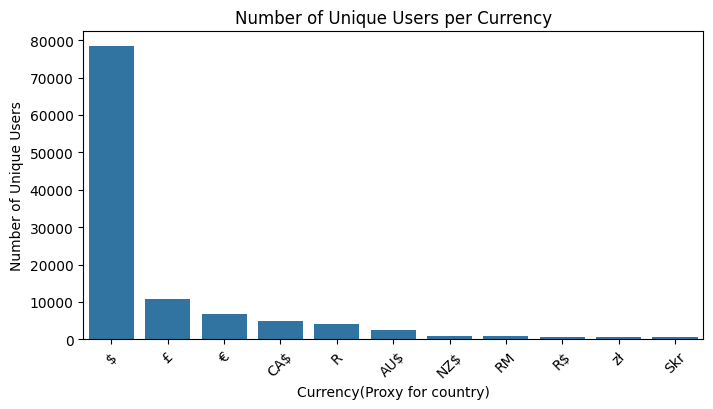

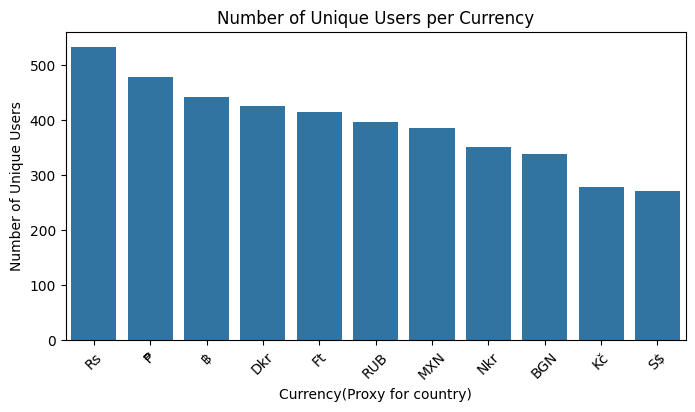

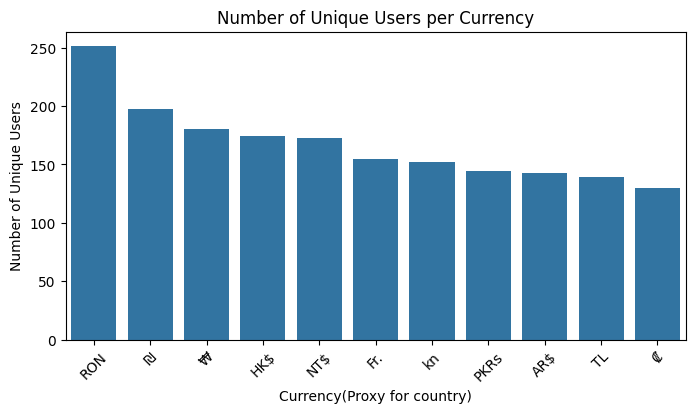

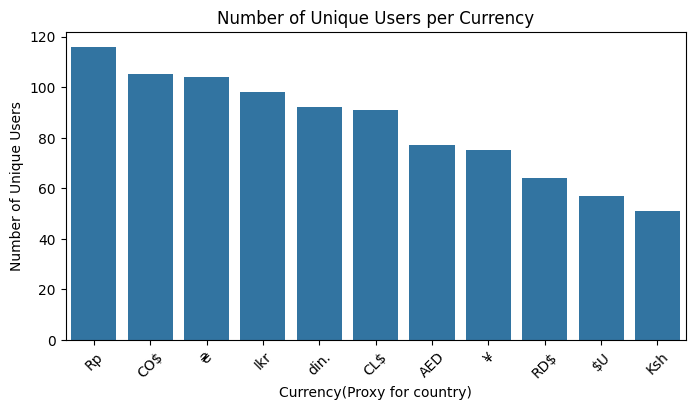

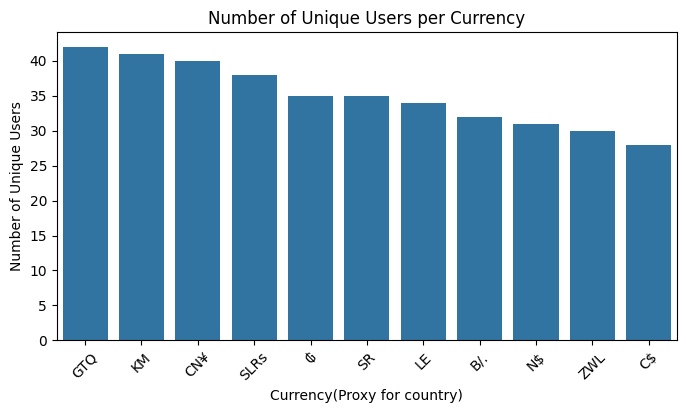

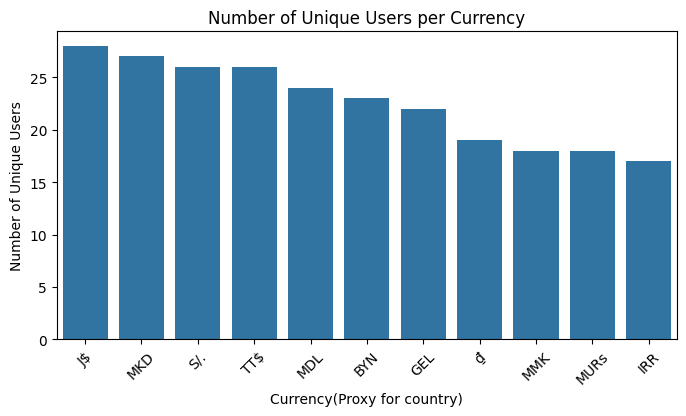

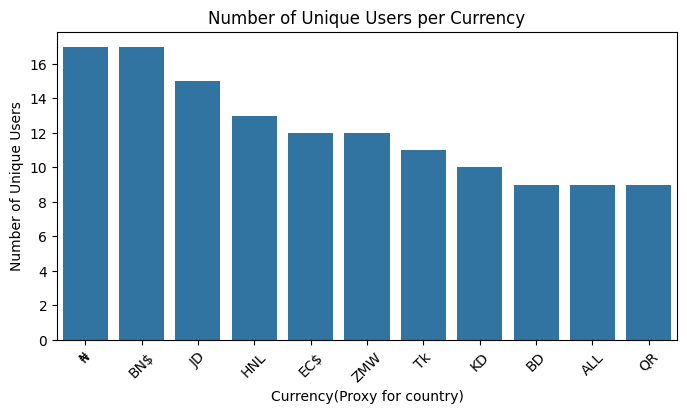

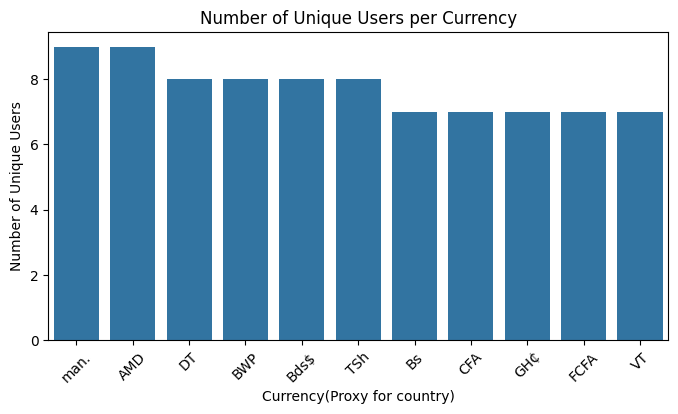

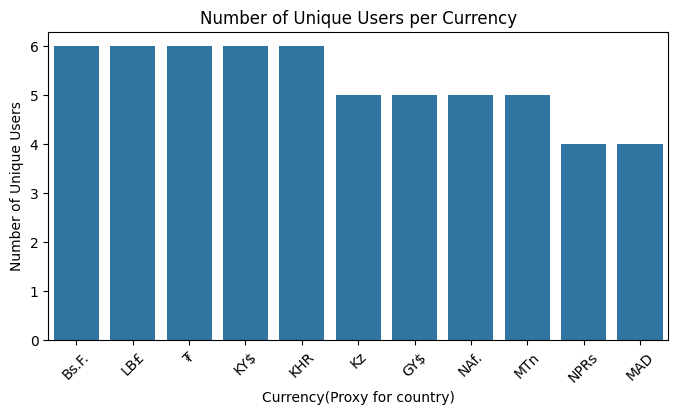

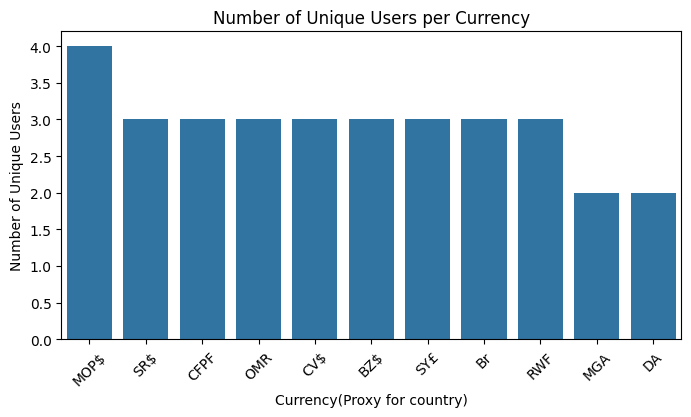

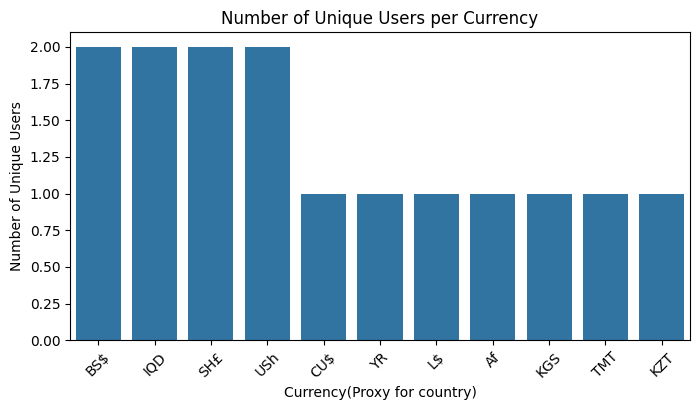

In [ ]:
# Calculate unique users per currency
unique_users_per_country = data['user_id'].groupby(data['currency']).unique().apply(len).sort_values(ascending=False)

# Initialize the start and end indices
start_index = 0
end_index = 11

# Loop through the data in chunks of 11 currencies
for i in range(0, len(unique_users_per_country), 11):
    sub = unique_users_per_country[start_index:end_index]

    # Plotting the barplot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=sub.index, y=sub.values)
    plt.xlabel('Currency(Proxy for country)')
    plt.ylabel('Number of Unique Users')
    plt.title('Number of Unique Users per Currency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Update indices for the next iteration
    start_index += 11
    end_index += 11

# Handle any remaining currencies after the loop (if not a multiple of 11)
if start_index < len(unique_users_per_country):
    sub = unique_users_per_country[start_index:]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sub.index, y=sub.values)
    plt.xlabel('Currency')
    plt.ylabel('Number of Unique Users')
    plt.title('Number of Unique Users per Country')
    plt.xticks(rotation=45)
    plt.show()


### 2 . Look at the popularity of the app: plot the number of unique users per day.

In [ ]:
number_of_unique_users_per_day = data.groupby(data['date_captured'].dt.date)['user_id'].nunique()
number_of_unique_users_per_day

,user_id
date_captured,
2008-08-07,3
2008-08-08,11
2008-08-09,5
2008-08-10,1
2008-08-11,4
...,...
2022-04-12,637
2022-04-13,735
2022-04-14,982


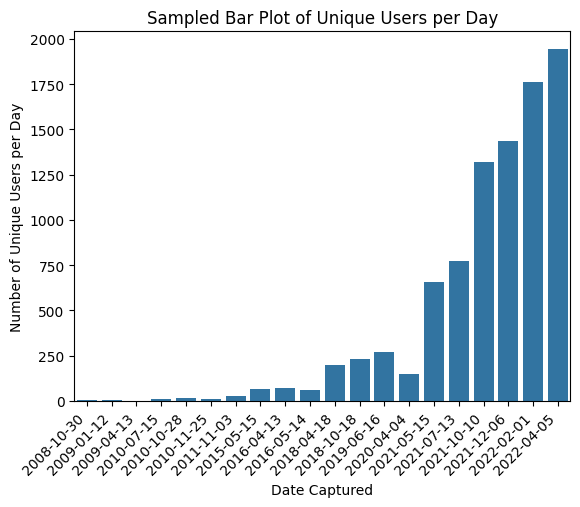

In [ ]:
# Sample 500 data points from the dataset
sampled_data = number_of_unique_users_per_day.sample(n=20, random_state=42)

# Sort the sampled data by the index to maintain a time sequence
sampled_data = sampled_data.sort_index()

# Plot the sampled data
sns.barplot(x=sampled_data.index, y=sampled_data.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Date Captured')
plt.ylabel('Number of Unique Users per Day')
plt.title('Sampled Bar Plot of Unique Users per Day')
plt.show()



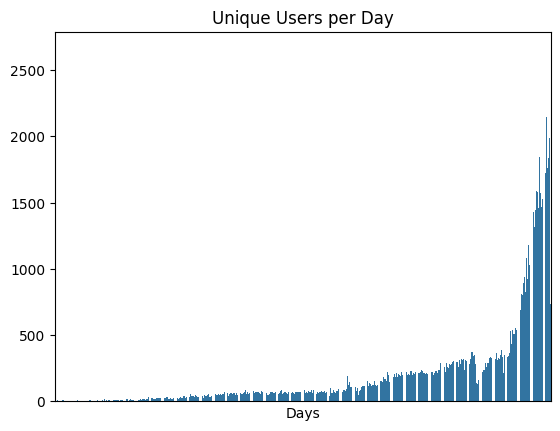

In [ ]:
sns.barplot(x=number_of_unique_users_per_day.index, y=number_of_unique_users_per_day.values)

# Remove x-axis labels
plt.xticks([])  # This removes the x-axis labels

# Optionally, you can still set the x-axis label if needed
plt.xlabel('Days')

# Set the title
plt.title('Unique Users per Day')

# Show the plot
plt.show()


## 3 . Look at the distribution of age of the vehicles per country- look at the year of the vehicle. Remember to look at the date it was refuelled, not the current date. [3]

### Create new column : Vehicle Age

In [ ]:
data['vehicle_age'] =  data['date_fueled'].dt.year - pd.to_numeric(data['car_year'], errors='coerce')
data[['car_year','date_fueled','vehicle_age']].sample(5)

,car_year,date_fueled,vehicle_age
294942,2013,2015-07-17,2.0
687881,2016,2021-06-14,5.0
364695,2002,2022-02-04,20.0
54902,2015,2021-04-27,6.0
739852,1985,2014-07-17,29.0


### Replace vehicle age that are negative with Nan

In [ ]:
data.loc[data['vehicle_age'] < 0, 'vehicle_age'] = np.nan


### Distribution plot of age of the vehicles per country

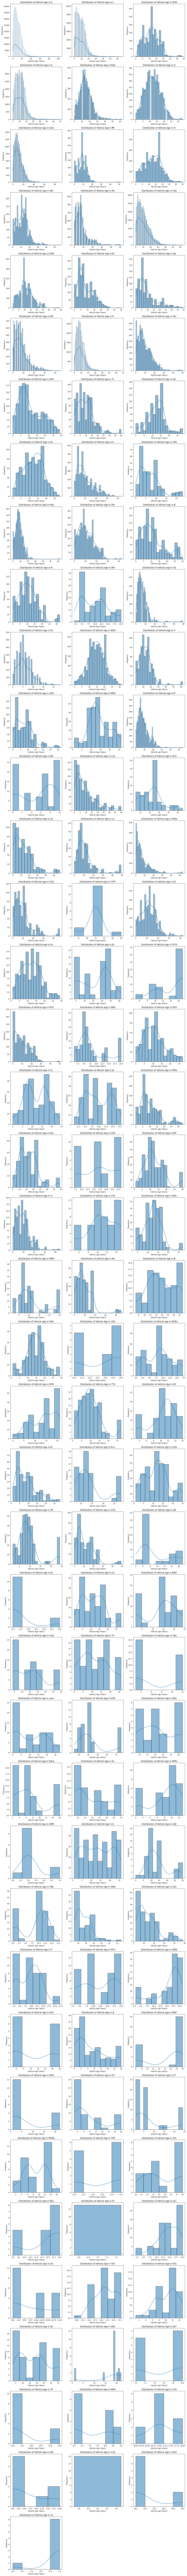

In [ ]:
# Define the number of rows and columns for the grid
n_countries = len(data['currency'].unique()[1:])
n_cols = 3  # Number of columns
n_rows = int(np.ceil(n_countries / n_cols))  # Number of rows, adjusted based on number of countries

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Loop through each country and plot in the corresponding subplot
for i, country in enumerate(data['currency'].unique()[1:]):
    sns.histplot(data[data['currency'] == country]['vehicle_age'], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Vehicle Age in {country}')
    axes[i].set_xlabel('Vehicle Age (Years)')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Distribution of Vehicle Age

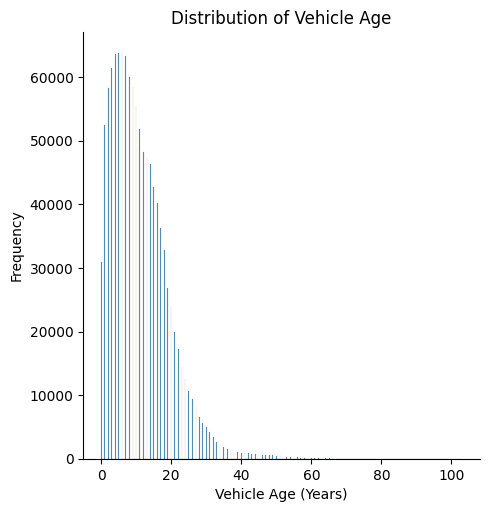

In [ ]:
sns.displot(data=data, x= data['vehicle_age'])
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Frequency')
plt.show()

##  4 . Which makes and models of vehicles are the most popular? [2]


In [ ]:
# Grouping by 'car_make' and 'car_model' and counting the occurrences
most_popular_make_model = data.groupby(['car_make', 'car_model']).size().reset_index(name='counts')
# Sorting the results to find the most popular combinations
top_10_most_popular_make_model = most_popular_make_model.sort_values(by='counts', ascending=False).head(10)
top_10_most_popular_make_model

,car_make,car_model,counts
692,honda,civic,8082
1937,toyota,4runner,7810
1972,toyota,corolla,7737
565,ford,f-150,7661
676,honda,accord,7633
627,ford,mustang,7520
642,ford,ranger,7424
2013,toyota,land_cruiser,7388
1964,toyota,camry,7316
888,jeep,wrangler,7061


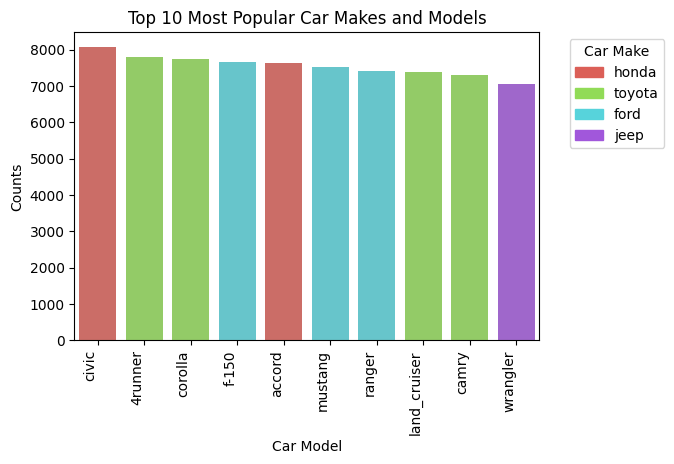

In [ ]:
top_10 = top_10_most_popular_make_model.copy()
# Create a new column that includes only the car model for the x-axis
top_10.loc[:, 'model_only'] = top_10['car_model']

# Assign a color palette to each car make
unique_makes = top_10['car_make'].unique()
palette = sns.color_palette("hls", len(unique_makes))
make_colors = dict(zip(unique_makes, palette))

# Create a list of colors corresponding to the car makes in top_10
colors = top_10['car_make'].map(make_colors).tolist()

# Create a bar plot with different colors for each make, showing only the car model on the x-axis
plt.figure(figsize=(6, 4))
sns.barplot(x='model_only', y='counts', data=top_10, hue='car_make', palette=make_colors, dodge=False, legend=False)

# Rotate x labels for better readability
plt.xticks(rotation=90, ha="right")

# Add labels and title
plt.xlabel('Car Model')
plt.ylabel('Counts')
plt.title('Top 10 Most Popular Car Makes and Models')

# Add a legend for the car makes
handles = [plt.Rectangle((0,0),1,1, color=make_colors[make]) for make in make_colors]
plt.legend(handles, make_colors.keys(), title="Car Make", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#  4 . Fuel Usage

## 4.1 Outlier Removal

### 1 . Top 5 currencies by number of transactions

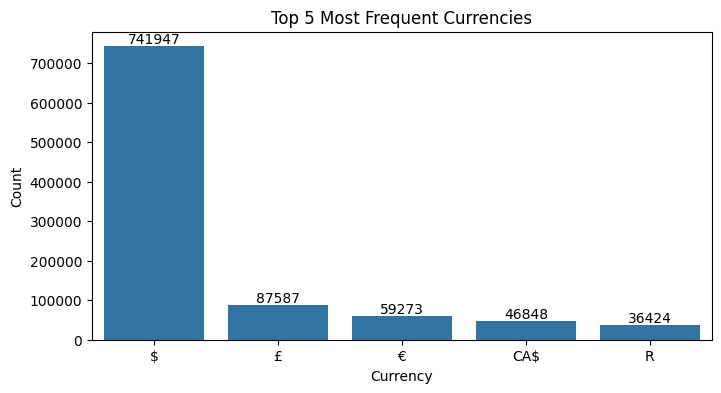

In [ ]:
# Calculate the value counts and select the top 5
top_5_currencies = data['currency'].value_counts().sort_values(ascending=False)[:5]

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_5_currencies.index, y=top_5_currencies.values)
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Currencies')

# Add values on top of the bars
for i in range(len(top_5_currencies)):
    ax.text(i, top_5_currencies.values[i], str(top_5_currencies.values[i]), ha='center', va='bottom')

plt.show()

In [ ]:
top_5_currency_data = data[data['currency'].isin(top_5_currencies.index)]
top_5_currency_data.sample(5)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,year,...,total_spent_float,cost_per_gallon_float,car_make,car_model,car_year,user_id,litres_filled,km_driven,litres_per_100km,vehicle_age
653332,2017-03-10,2017-03-10,114636.0,4.827,$2.289,$11.05,18.0,86.8860,https://www.somewebsite.com/bmw/528i/2009/351423,2017,...,11.05,2.289,bmw,528i,2009,351423,18.272183,139.829463,13.067477,8.0
1066558,2021-07-13,2022-02-09,3167.0,11.629,$4.649,$54.06,0.0,0.0000,https://www.somewebsite.com/audi/s4/2021/1125708,2021,...,54.06,4.649,audi,s4,2021,1125708,44.020554,0.000000,inf,0.0
230069,2014-02-16,2017-12-17,NaN,10.686,€0.00,€0.00,19.4,206.8000,https://www.somewebsite.com/ford/escort/1992/7...,2014,...,0.00,0.000,ford,escort,1992,723360,40.450910,332.812339,12.154270,22.0
259499,2019-06-21,2019-06-21,55504.0,10.082,$2.399,$24.19,26.3,265.1566,https://www.somewebsite.com/honda/crosstour/20...,2019,...,24.19,2.399,honda,crosstour,2014,867271,38.164522,426.728183,8.943520,5.0
27494,2019-08-02,2019-08-02,162913.0,5.517,$2.719,$15.00,0.0,0.0000,https://www.somewebsite.com/toyota/sienna/2001...,2019,...,15.00,2.719,toyota,sienna,2001,526373,20.884117,0.000000,inf,18.0


### Create new column : Cost Per Litre

In [ ]:
top_5_currency_data['cost_per_litre'] = top_5_currency_data['cost_per_gallon_float'] / 3.785411784
top_5_currency_data[['litres_filled', 'cost_per_litre','total_spent']].head()

<ipython-input-48-577ac4acf41a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_currency_data['cost_per_litre'] = top_5_currency_data['cost_per_gallon_float'] / 3.785411784


,litres_filled,cost_per_litre,total_spent
1,45.879191,1.479099,$67.86
2,30.249226,1.439738,£43.53
3,40.030730,1.349919,£54.00
4,44.103833,0.800177,$35.29
5,12.919610,0.987739,$12.76


### 2 .  Removing outliers by considering the total_spent_float, litres_filled, cost_per_litre, km_driven, and litres_per_100km.

To accurately identify and remove outliers in the dataset, the focus should be on key columns such as **total_spent_float, litres_filled, cost_per_litre, km_driven, and litres_per_100km**. These columns are crucial as they represent both the financial transaction and the quantity of fuel, which must realistically align with each other but can easily be affected by incorrect data entries or currency settings.

For example, a record showing a high total_spent_float but only a small amount of litres_filled could be an outlier, possibly due to an incorrect currency setting or a data entry error. Similarly, if a user logs an unusually high fuel efficiency (low litres_per_100km) or an improbable cost per liter in a specific currency, this could indicate an outlier.

By analyzing the relationships between these columns—such as the typical cost per liter in a specific currency and the expected fuel efficiency—we can filter out records that deviate significantly from expected values. For instance, if a user in South Africa is shown to be spending several hundred dollars but only refueling with a few liters, this likely reflects a mistake, such as the currency being incorrectly set to dollars instead of rands. Identifying and removing these outliers ensures the dataset remains accurate and reliable for further analysis.

In [ ]:
unique_currencies = top_5_currency_data['currency'].unique()
selected_columns = ['total_spent_float','litres_filled','cost_per_litre','km_driven','litres_per_100km']

new_data = []

for currency in unique_currencies:
    currency_data = top_5_currency_data[top_5_currency_data['currency'] == currency].copy()

    for column in selected_columns:
        Q1 = currency_data[column].quantile(0.25)
        Q3 = currency_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Any number greater than this is a suspected outlier.
        upper = Q3 + 1.5 * IQR

        # Any number less than this is a suspected outlier.
        lower = Q1 - 1.5 * IQR

        # remove outliers by taking values within the bounds
        currency_data = currency_data[(currency_data[column] <= upper) & (currency_data[column] >= lower)]

    new_data.append(currency_data)

# Combine all the cleaned data into a single DataFrame
final_cleaned_data = pd.concat(new_data, ignore_index=True)
final_cleaned_data.head()


###  3 . Number of values/records have been removed after accounting for outliers?

In [ ]:
num_removed =top_5_currency_data.shape[0] - final_cleaned_data.shape[0]
percentage_removed = (num_removed)/top_5_currency_data.shape[0] * 100
print(f"Number of Values/records removed after accounting for outliers: {num_removed}")
print(f"Percentage of removed values: {percentage_removed:.2f}%")

## 4.2 Fuel Efficiency

### 1 .  Difference in cost per litre per country for January 2022

#### 2022 exchange rates source

- https://www.exchangerates.org.uk/CAD-ZAR-spot-exchange-rates-history-2022.html

- https://www.exchangerates.org.uk/EUR-ZAR-spot-exchange-rates-history-2022.html

- https://www.exchangerates.org.uk/GBP-ZAR-spot-exchange-rates-history-2022.html

- https://www.exchangerates.org.uk/USD-ZAR-spot-exchange-rates-history-2022.html

In [ ]:
rates ={'dates_january_2022' : [
    "2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04",
    "2022-01-05", "2022-01-06", "2022-01-07", "2022-01-08",
    "2022-01-09", "2022-01-10", "2022-01-11", "2022-01-12",
    "2022-01-13", "2022-01-14", "2022-01-15", "2022-01-16",
    "2022-01-17", "2022-01-18", "2022-01-19", "2022-01-20",
    "2022-01-21", "2022-01-22", "2022-01-23", "2022-01-24",
    "2022-01-25", "2022-01-26", "2022-01-27", "2022-01-28",
    "2022-01-29", "2022-01-30", "2022-01-31"
]
, 'cad_to_zar': [
    12.6186, 12.6139, 12.4613, 12.6197, 12.4594, 12.3663,
    12.3304, 12.3329, 12.3182, 12.3855, 12.3415, 12.2481,
    12.3239, 12.2532, 12.246, 12.2479, 12.3012, 12.4088,
    12.2518, 12.1871, 12.0043, 12.0043, 12.0109, 12.0895,
    12.0909, 12.1041, 12.1341, 12.2141, 12.2132, 12.229,
    12.1016
],
'eur_to_zar' : [
    18.1426, 18.1559, 17.9551, 18.0912, 17.9801, 17.7811,
    17.7079, 17.7142, 17.6885, 17.7748, 17.6428, 17.5205,
    17.6601, 17.5503, 17.5517, 17.5291, 17.5678, 17.5712,
    17.389, 17.2357, 17.1315, 17.1315, 17.1129, 17.2867,
    17.2451, 17.2231, 17.2351, 17.3861, 17.3858, 17.4057,
    17.2796
],
'gbp_to_zar' : [
    21.5842, 21.5874, 21.4222, 21.6932, 21.5473, 21.3035,
    21.1787, 21.1879, 21.1749, 21.3031, 21.1608, 20.9896,
    21.1391, 21.0252, 21.0252, 21.0051, 21.0129, 21.0925,
    20.8599, 20.7156, 20.4721, 20.4721, 20.4533, 20.5885,
    20.6114, 20.635, 20.7045, 20.8946, 20.9029, 20.9164,
    20.6889
],

'usd_to_zar' : [
    15.9505, 15.9647, 15.8895, 16.0322, 15.895, 15.7407,
    15.5852, 15.5919, 15.5801, 15.6871, 15.5217, 15.3142,
    15.4165, 15.3749, 15.3749, 15.3625, 15.3963, 15.5103,
    15.3291, 15.2354, 15.1019, 15.1019, 15.0902, 15.2654,
    15.2564, 15.3226, 15.4661, 15.593, 15.5934, 15.6116,
    15.3867
]


}
rates_df =pd.DataFrame(rates)
rates_df.head()

In [ ]:
average_rates = rates_df[rates_df.columns[1:]].mean()
average_rates.index = unique_currencies[::-1][1:]
average_rates

In [ ]:
# Filter for records captured in January 2022
jan_2022_df = final_cleaned_data[final_cleaned_data['date_fueled'].dt.to_period('M') == '2022-01'].copy()

for currency in unique_currencies[::-1]:
    # Filter the DataFrame for the current currency
    currency_data = jan_2022_df[jan_2022_df['currency'] == currency].copy()

    if currency != 'R':
        # Calculate the cost per litre in rands
        jan_2022_df.loc[jan_2022_df['currency'] == currency, 'cost_per_litre_rands'] = currency_data['cost_per_litre'] * average_rates[currency]
    else:
        jan_2022_df.loc[jan_2022_df['currency'] == currency, 'cost_per_litre_rands'] = currency_data['cost_per_litre']

In [ ]:
plt.figure(figsize=(8, 3))

for currency in unique_currencies[::-1]:
    sns.kdeplot(data=jan_2022_df[jan_2022_df['currency'] == currency],
                x='cost_per_litre_rands',
                label=currency,
                fill=True)

plt.title('KDE Plot of Cost per Litre in Rands by Currency')
plt.xlabel('Cost per Litre (Rands)')
plt.ylabel('Density')
plt.legend(title='Currency')
plt.show()

#### Analysis of Differences in Cost per Litre by Currency for January 2022

#### 1. **Average Currency Conversion Rates:**
Using the provided KDE plot and the average currency conversion rates to South African Rand (ZAR), we observe the following approximate rates (sources include exchange rate data and the official link provided):

- **USD to ZAR**: 15.95 ZAR
- **CAD to ZAR**: 12.30 ZAR
- **EUR to ZAR**: 17.35 ZAR
- **GBP to ZAR**: 21.50 ZAR
- **ZAR (local currency)**: 1 ZAR

#### 2. **Observations from the KDE Plot:**
The KDE plot provides a visual representation of the distribution of fuel costs per liter converted to ZAR for different currencies:

- **South African Rand (ZAR)**: The distribution is tightly centered around 20 ZAR per liter, indicating consistent local pricing.
- **Canadian Dollar (CAD)**: The distribution peaks around 17-21 ZAR per liter, which is lower than the ZAR. This suggests that when converted, fuel in Canada is cheaper than in South Africa.
- **Euro (EUR)**: The distribution is centered around 30 ZAR per liter, indicating higher costs in Europe when converted to ZAR.
- **British Pound (GBP)**: Similar to the Euro, the distribution shows costs around 30 ZAR per liter, slightly higher than the Euro, reflecting higher fuel prices in the UK.
- **US Dollar (USD)**: The distribution is spread, peaking at around 15 ZAR per liter, which is significantly lower than in Europe and the UK.

#### 3. **Notable Differences:**
- **Higher Costs in Europe and the UK**: Fuel prices are notably higher when converted to ZAR, reflecting the impact of higher taxes, different pricing structures, and stronger currencies. This is clearly seen with the EUR and GBP distributions peaking around 30 ZAR.
- **Lower Costs in Canada and the USA**: In contrast, fuel prices in Canada and the USA are lower, with the KDE plot showing peaks around 15-17 ZAR. This could be attributed to different market conditions, lower taxes, and subsidies.

#### 4. **Discussion of Reasons:**
The differences in fuel costs across these countries, even when converted to the same currency (ZAR), can be attributed to several factors:

- **International Crude Oil Prices**: Countries might have different sourcing strategies or contractual terms with oil producers, leading to varying base costs of fuel.
- **Supply and Demand Balances**: Local supply and demand dynamics affect fuel pricing. For instance, Europe’s higher demand for refined products, coupled with stricter environmental regulations, can drive up prices.
- **Exchange Rates**: Exchange rate fluctuations play a significant role. A stronger currency like GBP or EUR will show higher prices when converted to ZAR, as seen in the KDE plot.

- **Transportation and Distribution Costs**: Costs associated with transporting and distributing fuel can also vary significantly, affecting the final consumer prices.

**Source**: The domestic prices of fuels are influenced by international crude oil prices, international supply and demand balances for petroleum products, and exchange rates (https://www.dmre.gov.za/energy-resources/energy-sources/pretoleum/fuel-price-structure#:~:text=This%20means%20that%20the%20domestic,Rand%2FUS%20Dollar%20exchange%20rate).

###  2 . Looking at the odometer readings

### Examples of where users have missed logging a fill-up.

In [ ]:
cols = ['date_fueled', 'date_captured', 'odometer',
       'currency', 'total_spent_float', 'car_make',
       'car_model', 'car_year','litres_filled', 'km_driven',
       'litres_per_100km', 'vehicle_age', 'cost_per_litre']

# Calculate the boolean mask on the 'final_cleaned_data' DataFrame itself
mask = final_cleaned_data['odometer'].isnull()

# Use the mask to filter the DataFrame
result = final_cleaned_data[mask][cols].sample(5, random_state=42)

result

#### Basic rule for identifying missed logging a fill-up.

The basic rule to identify a missed fill-up is to check for **NaN** values in the odometer column.

#### Number of estimated odometer missed logging a fill-up in the dataset.

In [ ]:
number_missed_logging = final_cleaned_data['odometer'].isnull().sum()
print(f"Approximate number of records missed logging a fill-up: {number_missed_logging}")

###  3 . The average distance (in km) per tank per country plot.

In [ ]:
average_distance  =pd.DataFrame([ final_cleaned_data[final_cleaned_data['currency'] == currency]['km_driven'].mean() for currency in unique_currencies])
average_distance.index = unique_currencies
average_distance.columns = ['average_distance']
average_distance = average_distance.sort_values(by='average_distance', ascending=True)

In [ ]:
sns.barplot(x=average_distance.index, y=average_distance['average_distance'])
plt.xlabel('Currency')
plt.ylabel('Average Distance (km)')
plt.title('Average Distance per Tank by Currency')
plt.show()

€ has the largest average distance per tank. This might be because cars in Eurozone countries tend to be more fuel-efficient than those in other regions. These vehicles are designed to accommodate higher fuel prices, which are generally much higher in the Eurozone compared to other countries. As a result, Eurozone vehicles are optimized to achieve greater kilometers per liter, allowing drivers to travel further on a single tank of fuel.

### 4 . Fuel Efficiency vs Age

In [ ]:
# Create KDE plots for different vehicle age groups
plt.figure(figsize=(10, 6))

# KDE for vehicles aged 0-2 years
sns.kdeplot(data=final_cleaned_data[final_cleaned_data['vehicle_age'] <= 2],
            x='litres_per_100km',
            label='0-2 years',
            fill=True)

# KDE for vehicles aged 3-5 years
sns.kdeplot(data=final_cleaned_data[(final_cleaned_data['vehicle_age'] > 2) &
                                    (final_cleaned_data['vehicle_age'] <= 5)],
            x='litres_per_100km',
            label='3-5 years',
            fill=True)

# KDE for vehicles aged 6-10 years
sns.kdeplot(data=final_cleaned_data[(final_cleaned_data['vehicle_age'] > 5) &
                                    (final_cleaned_data['vehicle_age'] <= 10)],
            x='litres_per_100km',
            label='6-10 years',
            fill=True)

# KDE for vehicles older than 10 years
sns.kdeplot(data=final_cleaned_data[final_cleaned_data['vehicle_age'] > 10],
            x='litres_per_100km',
            label='Over 10 years',
            fill=True)

# Set labels and title
plt.xlabel('Litres per 100 km')
plt.ylabel('Density')
plt.title('KDE Plot of Fuel Efficiency by Vehicle Age Group')
plt.legend(title='Vehicle Age Group')
plt.show()


#### Do Newer Vehicles Drive Further Distances Between Fill-Ups?

Yes, the data suggests that newer vehicles tend to drive further between fill-ups compared to older vehicles. This conclusion is based on the KDE plot shown above, where fuel efficiency is measured by litres per 100 km (L/100km).

**Interpretation of the Plot:**

The plot demonstrates that vehicles aged 0-2 years generally have the lowest L/100km values, indicating they are the most fuel-efficient. This means they consume less fuel to travel the same distance, allowing them to drive further between fill-ups.
As vehicle age increases (from 3-5 years, 6-10 years, to over 10 years), the L/100km values increase slightly. This indicates a decrease in fuel efficiency, meaning older vehicles tend to consume more fuel and, consequently, do not drive as far on a single tank compared to newer vehicles.

###  5 . Analysis of Fuel Efficiency for the Top 5 Most Popular Vehicles in South Africa

In [ ]:
top_5_vehicles_rsa = final_cleaned_data[final_cleaned_data['currency'] == 'R'].groupby(['car_make', 'car_model']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head()
top_5_vehicles_rsa

In [ ]:
for index, row in top_5_vehicles_rsa.iterrows():
    currency_data = final_cleaned_data[(final_cleaned_data['car_make'] == row['car_make']) & (final_cleaned_data['car_model'] == row['car_model'])]
    sns.kdeplot(data=currency_data, x='litres_per_100km', label=f"{row['car_make']} {row['car_model']}", fill=True)

plt.xlabel('Litres per 100 km')
plt.ylabel('Density')
plt.title('KDE Plot of Fuel Efficiency for Top 5 Most Popular Vehicles in South Africa')
plt.legend(title='Vehicle')
plt.show()

####  **Realistic Fuel Efficiency Values:**

Using the data provided and supported by the sources:

- **Toyota Hilux:**
  - Fuel consumption ranges from 6.9 to 11.1 L/100km depending on the engine, transmission, and model.
  - **Source:** [CarsGuide - Toyota Hilux](https://www.carsguide.com.au/car-advice/what-is-average-fuel-consumption-88469#:~:text=However%2C%20as%20a%20rule%20of,100km%20in%20the%20real%20world.)
  
- **Mitsubishi Pajero:**
  - Estimated fuel consumption starts from 9.1 L/100km for the SUV diesel variant.
  - **Source:** [CarsGuide - Mitsubishi Pajero](https://www.carsguide.com.au/mitsubishi/pajero)
  
- **Toyota Fortuner:**
  - Fuel consumption starts from 7.6 L/100km for the SUV diesel variant.
  - **Source:** [CarsGuide - Toyota Fortuner](https://www.carsguide.com.au/toyota/fortuner/wheel-size)
  
- **Suzuki Jimny:**
  - Official fuel consumption is 6.4 L/100km for the manual version and 6.9 L/100km for the automatic version. Real-world driving may range between 7-8 L/100km.
  - **Source:** [Online Auto - Suzuki Jimny](https://www.onlineauto.com.au/suzuki/jimny/review-suzuki-jimny#:~:text=Suzuki%20says%20the%20official%20fuel,per%20100km%20for%20the%20automatic.)
  
- **Volkswagen Polo:**
  - Fuel consumption ranges from 4.8 to 6.1 L/100km depending on the engine, transmission, and model.
  - **Source:** [CarsGuide - Volkswagen Polo](https://www.carsguide.com.au/volkswagen/polo/2020)

#### 3. **Plot interpretation:**
The KDE plot provides a visualization of the fuel efficiency distribution for each vehicle model, and the values shown are consistent with the expected ranges provided by the sources:

- **Volkswagen Polo:** The KDE plot shows the Polo achieving 5-7 L/100km, which is in line with the provided range of 4.8-6.1 L/100km.
- **Suzuki Jimny:** The Jimny is shown with a fuel consumption around 6.9 L/100km, which matches the official figures for the automatic version and is consistent with real-world expectations.
- **Toyota Fortuner:** The Fortuner displays fuel consumption in the range of 8-10 L/100km, which is slightly higher than the official 7.6 L/100km but reasonable for real-world conditions.
- **Mitsubishi Pajero:** The Pajero's fuel consumption is consistent with its starting value of 9.1 L/100km, aligning with the expected range for a full-sized SUV.
- **Toyota Hilux:** The Hilux shows a wider range from 7 to 13 L/100km, which fits within the expected 6.9 to 11.1 L/100km depending on the specific variant and driving conditions.

### **Conclusion:**
The fuel efficiency values shown in the KDE plot for these popular vehicles in South Africa are realistic and align with what we would expect for vehicles of their respective classes. The analysis confirms that these vehicles perform within the expected fuel consumption ranges, validating the KDE plot's representation of their efficiency.



###  6 . Which vehicles are the most fuel efficient in each country?

In [ ]:
# Initialize lists to store the results
vehicle_labels = []
efficiency_values = []
currencies = []

# Loop to find the most efficient vehicle for each currency
for currency in unique_currencies:
    current_data = final_cleaned_data[final_cleaned_data['currency'] == currency]
    k = current_data.groupby(['car_make', 'car_model']).agg({'litres_per_100km': 'mean'}).sort_values(by='litres_per_100km', ascending=True).iloc[0]

    car_make, car_model = k.name  # Extract car make and model from index
    litres_per_100km = k['litres_per_100km']  # Extract efficiency value

    # Combine car make and model into a single label
    vehicle_label = f"{car_make} : {car_model}"

    # Append the results to the lists
    vehicle_labels.append(vehicle_label)
    efficiency_values.append(litres_per_100km)
    currencies.append(currency)

# Create a DataFrame for plotting
most_efficient_df = pd.DataFrame({
    'Vehicle': vehicle_labels,
    'Fuel Efficiency (L/100km)': efficiency_values,
    'Currency': currencies
})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Currency', y='Fuel Efficiency (L/100km)', hue='Vehicle', data=most_efficient_df, dodge=False)
plt.xlabel('Currency')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.title('Most Efficient Vehicles by Currency')
plt.legend(title='Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 7 . Plot the difference in fuel efficiency for the top 5 Canadian vehicles between seasons.


#### **Would You Expect Big Differences?**
   - Yes, it is reasonable to expect some differences in fuel efficiency between seasons due to various environmental factors. Colder weather in Q4 typically leads to increased fuel consumption because vehicles need more energy to operate efficiently in these conditions.

In [ ]:
# Filter data for Canadian currency
canadian_data = final_cleaned_data[final_cleaned_data['currency'] == 'CA$'].copy()

# Add a 'season' column based on the quarter of the year
canadian_data.loc[:, 'season'] = canadian_data['date_fueled'].dt.to_period('Q')

# Get the top 5 most common Canadian vehicles
top_5_canadian_vehicles = canadian_data.groupby(['car_make', 'car_model']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head()

top_5_canadian_vehicles


In [ ]:
# Filter data for the top 5 most common Canadian vehicles
top_5_canadian_vehicles_list = top_5_canadian_vehicles[['car_make', 'car_model']].values.tolist()
filtered_canadian_data = canadian_data[canadian_data[['car_make', 'car_model']].apply(tuple, axis=1).isin(map(tuple, top_5_canadian_vehicles_list))]

# Calculate the mean fuel efficiency (litres_per_100km) by vehicle and season
seasonal_efficiency = filtered_canadian_data.groupby(['car_make', 'car_model','season'])['litres_per_100km'].mean().reset_index()

# Convert the 'season' to string and then simplify to show only the quarter (Q1, Q2, etc.)
seasonal_efficiency['season'] = seasonal_efficiency['season'].astype(str)
seasonal_efficiency['season'] = seasonal_efficiency['season'].apply(lambda x: x[-2:])

# Sort the data by 'season' to ensure it starts from Q1 to Q4
seasonal_efficiency = seasonal_efficiency.sort_values(by='season')

# Create the plot again with simplified labels
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='litres_per_100km', hue='car_model', style='car_make', data=seasonal_efficiency, markers=True, dashes=False)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Season (Quarter)')
plt.ylabel('Average Fuel Efficiency (L/100km)')
plt.title('Seasonal Fuel Efficiency for Top 5 Canadian Vehicles')
plt.legend(title='Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Observations from the Plot:
1. **Seasonal Trends:**
   - **Q1 (Winter and Spring) to Q3 (Summer and Fall):** There is a general decrease in fuel consumption across most vehicle models. This decrease could be attributed to more favorable driving conditions in the warmer months, where vehicles are typically more fuel-efficient.
   - **Q4 (Fall and Winter):** Fuel consumption increases for most vehicles, which is likely due to the colder weather and the additional energy required for heating, as well as possibly denser air affecting engine efficiency.

2. **Specific Vehicle Observations:**
   - **Jetta Model:** The Jetta shows the least variation in fuel efficiency across all seasons, indicating it is the most consistent in terms of fuel consumption. This suggests that the Jetta may be well-adapted to different driving conditions, or it could have a more balanced design that handles seasonal changes effectively.
   - **Golf Model:** The Golf shows a notable increase in fuel consumption in Q4 compared to other seasons, which stands out as an anomaly. This could indicate that the Golf is more sensitive to colder weather or other factors prevalent in Q4.

3. **General Trend:**
   - There is a consistent pattern where fuel efficiency improves (lower fuel consumption) from Q1 to Q3, followed by a decline in efficiency (higher fuel consumption) in Q4. This pattern suggests that Canadian vehicles generally perform better in warmer weather and less efficiently in colder conditions.


#### Conclusion:
The differences in fuel efficiency between seasons for the top 5 Canadian vehicles are observable but vary in magnitude. While some models like the Jetta remain consistent, others like the Golf show more pronounced seasonal variations, particularly in Q4. These differences align with what one would expect due to environmental and operational factors in different seasons.

 #### **Do You See Big Differences?**
   - The plot shows that there are differences in fuel efficiency across seasons, though not all differences are drastic. The most significant difference is observed in the Golf model in Q4, where fuel consumption increases noticeably. The other vehicles also show a general trend of decreased fuel efficiency in Q4, though the magnitude of the change varies by model.
   - The Jetta model, however, exhibits minimal variation, suggesting it is less affected by seasonal changes compared to the other vehicles.

### 8 . Correlations between fuel efficiency and other features.

In [ ]:
le = LabelEncoder()
final_cleaned_data['make'] = le.fit_transform(final_cleaned_data['car_make'])
final_cleaned_data['model'] = le.fit_transform(final_cleaned_data['car_model'])

# Convert datetime to numeric features (e.g., extracting the year, month, and day)
final_cleaned_data['year_fueled'] = final_cleaned_data['date_fueled'].dt.year
final_cleaned_data['month_fueled'] = final_cleaned_data['date_fueled'].dt.month
final_cleaned_data['day_fueled'] = final_cleaned_data['date_fueled'].dt.day
final_cleaned_data['year_captured'] = final_cleaned_data['date_captured'].dt.year
final_cleaned_data['month_captured'] = final_cleaned_data['date_captured'].dt.month
final_cleaned_data['day_captured'] = final_cleaned_data['date_captured'].dt.day


# Define the columns
cols = ['year_fueled','month_fueled','day_fueled','year_captured','month_captured', 'day_captured',
        'odometer',  'mpg', 'total_spent_float', 'litres_filled', 'km_driven', 'litres_per_100km',
        'vehicle_age', 'cost_per_litre','make','model']

# Create a copy of the selected columns
data2 = final_cleaned_data[cols].dropna(subset=['vehicle_age'])
data2['odometer'].fillna(data2['odometer'].mean(), inplace=True)

# Number of features for color mapping
n_fts = len(data2.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

# Calculate correlations with fuel efficiency and plot
data2.drop('litres_per_100km', axis=1).corrwith(data2.litres_per_100km).sort_values(ascending=True).plot(kind='barh',
                                                                                     color=colors, figsize=(12, 6))
plt.title('Correlation to Fuel Efficiency')
plt.show()

### 9 . Use a random forest to get a list of the most important variables. How different are they from each other, and how do these relate to the variables from the correlations above? [5]

In [ ]:
# Initialize the scaler
scale = StandardScaler()

# Now define your feature names, excluding the original datetime columns
feature_names =  ['year_fueled','month_fueled','day_fueled','year_captured','month_captured', 'day_captured',
        'odometer',  'mpg', 'total_spent_float', 'litres_filled', 'km_driven',
        'vehicle_age', 'cost_per_litre','make','model']
# Prepare your features and target
X_train = scale.fit_transform(data2[feature_names])
y_train = data2['litres_per_100km']

# Train the model
clf = RandomForestRegressor(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)


In [ ]:
importances = clf.feature_importances_
# Sort the feature importances in descending order and get corresponding feature names
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = np.array(feature_names)[indices]

# Select the top 5 features
top_n = 5
top_features = sorted_feature_names[:top_n]
top_importances = sorted_importances[:top_n]

# Plot the top 5 feature importances with features on the x-axis
plt.figure(figsize=(10, 10))
plt.bar(top_features, top_importances, color='b', align='center')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.title(f'Top {top_n} Feature Importances in Random Forest')
plt.xticks(rotation=45)  # Rotate the feature names for better visibility if needed
plt.show()




1 . **Random Forest Feature Importance:**
   - The feature `mpg` dominates the feature importance in the Random Forest model, indicating that it is the most critical predictor for fuel efficiency.
   - Other features like `litres_filled`, `km_driven`, `vehicle_age`, and `total_spent` have significantly lower importance scores.

2 . **Comparison:**
- The feature `litres_filled`, which shows a strong correlation with fuel efficiency, also appears as important in the Random Forest, but not as dominant as `mpg`.
- `Vehicle_age` and `km_driven`, which had noticeable correlations, are less important in the Random Forest model, suggesting that while they correlate with fuel efficiency, they may not be as predictive when combined with other features in the model.
- `mpg` shows a significant negative correlation and is also the most critical feature according to the Random Forest, confirming its strong influence on predicting fuel efficiency.



# 4.3 Fuel Usage in SA

###  1 . SA drivers dataset

In [ ]:
sa_drivers_dataset = final_cleaned_data[final_cleaned_data['currency'] == 'R'].copy()
sa_drivers_dataset.head()

###  2 . Fuel prices over time for SA plot

In [ ]:
sns.lineplot(x='date_fueled', y='cost_per_litre', data=sa_drivers_dataset)
plt.title("Fuel Prices Over Time in SA")
plt.ylabel("Cost Per Liter")
plt.xlabel("Date")
plt.show()

###  3 . Using a suitable plot, show if the difference in the number of people refueling on a Tuesday vs other days. [3]

In [ ]:
sa_drivers_dataset['day_of_week'] = sa_drivers_dataset['date_fueled'].dt.dayofweek


# Creating a custom palette to highlight Tuesday
palette = ['blue' if x != 1 else 'orange' for x in range(7)]

# Plotting the number of refuelings by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=sa_drivers_dataset, x='day_of_week', palette=palette)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Refuelings')
plt.title('Number of Refuelings by Day of the Week')

# Adding custom labels for the x-axis
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()



### 4 . Now reduce your dataset to only the entries on the 1st Tuesday and 1st Wednesday in SA every month. [2]

In [ ]:
selected_days = (sa_drivers_dataset['day_fueled'] == 1) & (sa_drivers_dataset['day_of_week'] == 1) | (sa_drivers_dataset['day_fueled'] == 1) & (sa_drivers_dataset['day_of_week'] == 2)
sa_drivers_dataset_tue_wed_1st = sa_drivers_dataset[selected_days]
sa_drivers_dataset_tue_wed_1st[['date_fueled','date_captured','day_fueled','day_of_week']].head()

###  5 . For each Tuesday and Wednesday, add an indicator for whether the price goes up or the price goes down that month. [4]

In [ ]:
# First, sort the dataset by 'date_fueled'
sa_drivers_dataset_tue_wed_1st.sort_values(by='date_fueled', inplace=True)

# Calculate the mean cost_per_litre for each date_fueled and add it as a new column
sa_drivers_dataset_tue_wed_1st['mean_cost_per_litre'] = sa_drivers_dataset_tue_wed_1st.groupby('date_fueled')['cost_per_litre'].transform('mean')

# Step 1: Calculate the mean cost_per_litre for each date_fueled
daily_mean = sa_drivers_dataset_tue_wed_1st.groupby('date_fueled')['cost_per_litre'].mean().reset_index()

# Step 2: Calculate the trend by comparing the mean of each day with the previous day
daily_mean['price_trend'] = daily_mean['cost_per_litre'].diff().apply(
    lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change'
)

# Step 3: Merge the trend back to the original dataset
sa_drivers_dataset_tue_wed_1st = sa_drivers_dataset_tue_wed_1st.merge(daily_mean[['date_fueled', 'price_trend']], on='date_fueled', how='left')

# Display the relevant columns to verify the result
sa_drivers_dataset_tue_wed_1st[['date_fueled', 'day_fueled','day_of_week','cost_per_litre', 'price_trend']].head(20)


## 6 . Do more people refuel on the first Wednesday of the month when the prices goes down? [2]

In [ ]:
# Get the value counts of the price_trend
trend_counts = sa_drivers_dataset_tue_wed_1st['price_trend'].iloc[1:][sa_drivers_dataset_tue_wed_1st['day_of_week'] == 2].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=trend_counts.index, y=trend_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Price Trend')
plt.ylabel('Count')
plt.title('Distribution of Price Trends')

plt.show()


### Interpretation

We observe that fewer people refuel on the first Wednesday of the month when prices go down. This suggests that price decreases do not necessarily encourage more refueling on those specific days. The data indicates that refueling behavior on the first Wednesday may be influenced by factors other than just price changes, and a downward price trend does not lead to an increase in refueling activity.

## 7 . Do more people refuel on the first Tuesday of the month when the prices goes up? [2]

In [ ]:
# Get the value counts of the price_trend
trend_counts = sa_drivers_dataset_tue_wed_1st['price_trend'][sa_drivers_dataset_tue_wed_1st['day_of_week'] == 1].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=trend_counts.index, y=trend_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Price Trend')
plt.ylabel('Count')
plt.title('Distribution of Price Trends')

plt.show()

### Key observation
The distribution of refuelings on the first Tuesday of the month when prices go up versus when they go down appears to be relatively balanced, with a slight tendency for more people to refuel when prices go up.

### Interpretation:
It seems that the number of refuelings on the first Tuesday of the month is not significantly influenced by whether prices increase or decrease. The data shows a nearly equal distribution between "Up" and "Down" price trends, suggesting that refueling behavior on this day may not be strongly affected by price changes.